In [6]:
%matplotlib inline
from CNN_Utils import *
from my_models import *
from Utils import *

In [7]:
data_dir = "../data_2013/eeg_fpz_cz"
classes = ['W', 'N1', 'N2', 'N3', 'REM']
n_classes = len(classes)
num_epochs = 20
batch_size = 128
learning_rate = 0.001
device = torch.device("cuda")

In [8]:
def run_experiment_cross_validation():
    CNNutils = CNN_Utils(learning_rate, batch_size, num_epochs)
    train_history_over_CV = []
    val_history_over_CV = []
    num_folds = 20

    for fold_id in range(0, num_folds):
        # Loading Data
        X_train, y_train, X_test, y_test = prep_train_validate_data(data_dir, num_folds, fold_id, batch_size)

        if fold_id == 0:
            print('Train Data Shape: ', X_train.shape, '    Test Data Shape: ', X_test.shape)
            print('\n')
        print("\nFold <" + str(fold_id+1) + ">")

        # model #
        net = ConvSimple()
        if fold_id == 0:
            display_num_param(net)
        net = net.to(device)

        train_history, validation_history = CNNutils.train_model(net, X_train, y_train, X_test, y_test, device)

        # accumulate history for each CV loop
        train_history_over_CV.append(train_history)
        val_history_over_CV.append(validation_history)

        del net

    plot_CV_history(train_history_over_CV, val_history_over_CV)

Train Data Shape:  (39680, 1, 3000)     Test Data Shape:  (2560, 1, 3000)



Fold <1>
There are 3088805 (3.09 million) parameters in this neural network
Epoch [1/20] , Accuracy :  61.547379032258064
Test Accuracy: 64.296875 %

Epoch [2/20] , Accuracy :  76.84223790322581
Test Accuracy: 65.0 %

Epoch [3/20] , Accuracy :  79.43800403225806
Test Accuracy: 65.234375 %

Epoch [4/20] , Accuracy :  82.0866935483871
Test Accuracy: 65.3125 %

Epoch [5/20] , Accuracy :  84.19102822580645
Test Accuracy: 58.3984375 %

Epoch [6/20] , Accuracy :  85.625
Test Accuracy: 53.515625 %

Epoch [7/20] , Accuracy :  87.79737903225806
Test Accuracy: 57.14843750000001 %

Epoch [8/20] , Accuracy :  88.8054435483871
Test Accuracy: 56.71874999999999 %

Epoch [9/20] , Accuracy :  91.41381048387098
Test Accuracy: 50.1953125 %

Epoch [10/20] , Accuracy :  93.46774193548387
Test Accuracy: 59.375 %

Epoch [11/20] , Accuracy :  97.19254032258064
Test Accuracy: 49.921875 %

Epoch [12/20] , Accuracy :  96.56502016129032


Epoch [2/20] , Accuracy :  76.99900793650794
Test Accuracy: 50.44642857142857 %

Epoch [3/20] , Accuracy :  80.06200396825398
Test Accuracy: 53.125 %

Epoch [4/20] , Accuracy :  82.71825396825396
Test Accuracy: 60.43526785714286 %

Epoch [5/20] , Accuracy :  85.21825396825396
Test Accuracy: 60.15625 %

Epoch [6/20] , Accuracy :  88.17460317460318
Test Accuracy: 53.18080357142857 %

Epoch [7/20] , Accuracy :  89.63789682539682
Test Accuracy: 59.09598214285714 %

Epoch [8/20] , Accuracy :  91.47321428571429
Test Accuracy: 54.85491071428571 %

Epoch [9/20] , Accuracy :  93.01835317460318
Test Accuracy: 55.80357142857143 %

Epoch [10/20] , Accuracy :  96.04662698412699
Test Accuracy: 57.8125 %

Epoch [11/20] , Accuracy :  97.7281746031746
Test Accuracy: 55.078125 %

Epoch [12/20] , Accuracy :  97.68353174603175
Test Accuracy: 52.51116071428571 %

Epoch [13/20] , Accuracy :  98.0109126984127
Test Accuracy: 53.34821428571429 %

Epoch [14/20] , Accuracy :  98.28373015873015
Test Accuracy: 51.

Epoch [7/20] , Accuracy :  90.75020032051282
Test Accuracy: 73.06985294117648 %

Epoch [8/20] , Accuracy :  90.35707131410257
Test Accuracy: 73.94301470588235 %

Epoch [9/20] , Accuracy :  93.21163862179486
Test Accuracy: 72.84007352941177 %

Epoch [10/20] , Accuracy :  95.42518028846155
Test Accuracy: 69.48529411764706 %

Epoch [11/20] , Accuracy :  97.38832131410257
Test Accuracy: 69.16360294117648 %

Epoch [12/20] , Accuracy :  96.87750400641025
Test Accuracy: 68.61213235294117 %

Epoch [13/20] , Accuracy :  97.49849759615384
Test Accuracy: 71.50735294117648 %

Epoch [14/20] , Accuracy :  97.81650641025641
Test Accuracy: 70.03676470588235 %

Epoch [15/20] , Accuracy :  98.42247596153845
Test Accuracy: 70.49632352941177 %

Epoch [16/20] , Accuracy :  97.97926682692307
Test Accuracy: 70.49632352941177 %

Epoch [17/20] , Accuracy :  98.8055889423077
Test Accuracy: 70.03676470588235 %

Epoch [18/20] , Accuracy :  99.34895833333334
Test Accuracy: 69.02573529411765 %

Epoch [19/20] , Accu

Epoch [10/20] , Accuracy :  95.65585191082803
Test Accuracy: 69.73958333333333 %

Epoch [11/20] , Accuracy :  98.01204219745223
Test Accuracy: 68.22916666666666 %

Epoch [12/20] , Accuracy :  97.21337579617835
Test Accuracy: 69.47916666666667 %

Epoch [13/20] , Accuracy :  97.80553343949045
Test Accuracy: 70.15625 %

Epoch [14/20] , Accuracy :  98.48726114649682
Test Accuracy: 71.09375 %

Epoch [15/20] , Accuracy :  98.93013535031847
Test Accuracy: 70.10416666666667 %

Epoch [16/20] , Accuracy :  99.29339171974523
Test Accuracy: 68.80208333333333 %

Epoch [17/20] , Accuracy :  99.46506767515923
Test Accuracy: 70.625 %

Epoch [18/20] , Accuracy :  99.48248407643312
Test Accuracy: 71.71875 %

Epoch [19/20] , Accuracy :  99.50736464968153
Test Accuracy: 68.125 %

Epoch [20/20] , Accuracy :  99.67406449044586
Test Accuracy: 70.57291666666666 %


Fold <17>
Epoch [1/20] , Accuracy :  60.7421875
Test Accuracy: 67.60817307692307 %

Epoch [2/20] , Accuracy :  75.46726661392405
Test Accuracy: 78

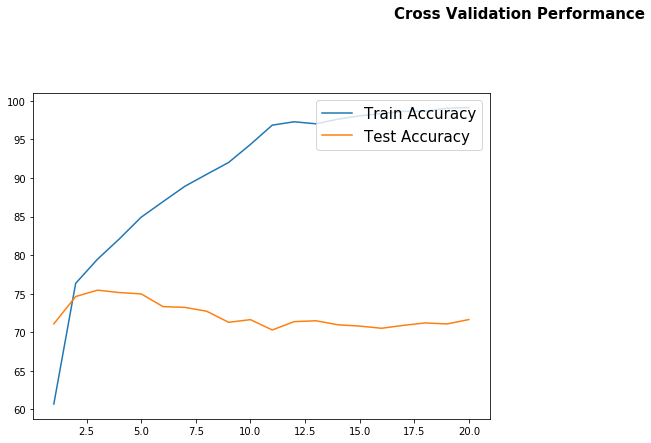

In [9]:
run_experiment_cross_validation()
